<a href="https://colab.research.google.com/github/Hemas3501/sentimental_analysis/blob/main/Sentimental_Analysis_on_Restaurant_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimental Analysis on Resturant reviews


In [ ]:
# import packages

import pandas as pd
import numpy as np

# from google.colab import drive

# drive.mount('content/drive')


from google.colab import files
uploaded= files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [ ]:
data = pd.read_csv('./Restaurant_Reviews.tsv', delimiter='\t')

data.shape

(1000, 2)

In [ ]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
data.shape

(1000, 2)

In [ ]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

**DATA PREPROCESSING**

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []

# loop through reviews
for i in range(0, 1000):
  # replace special patterns with space
  review = re.sub(pattern='[^a-zA-Z]', repl=' ', string= data['Review'][i])
  # convert all reviews into lower case
  review = review.lower()
  # split words
  review_words = review.split()
  # iterate through words and remove stop words if any
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
  # stemming
  ps = PorterStemmer()
  # extract root word
  review = [ps.stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)


In [ ]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
#creating a bag of words model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features= 1500)

x = cv.fit_transform(corpus).toarray()

y= data.iloc[:,1].values

**Split Data- (1000, 1500)**


*   In this step we are going to split data into two parts (training and testing) so, that we can train our model on training dataand test its accuracy on unseen test data.



In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30)

#Training (1000,500)
#1000*80/100=800
#1000*20/100=200

In [ ]:
x_train.shape,x_test.shape ,y_train.shape,y_test.shape

((700, 1500), (300, 1500), (700,), (300,))

In [ ]:
x_train,x_test, y_train,y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 

# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 69.0


# Multinomial naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred


array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test,y_pred)

print("___________Scores____________")
print("Accuracy Score:{}%".format(round(score1*100,2)))
print("Precision Score: {}%".format(round(score2*100,2)))
print("Recall Score: {}%".format(round(score3*100,2)))



___________Scores____________
Accuracy Score:77.33%
Precision Score: 76.43%
Recall Score: 79.47%


# consufion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  37],
       [ 31, 120]])

# Plotting

Text(95.72222222222221, 0.5, 'Actual values')

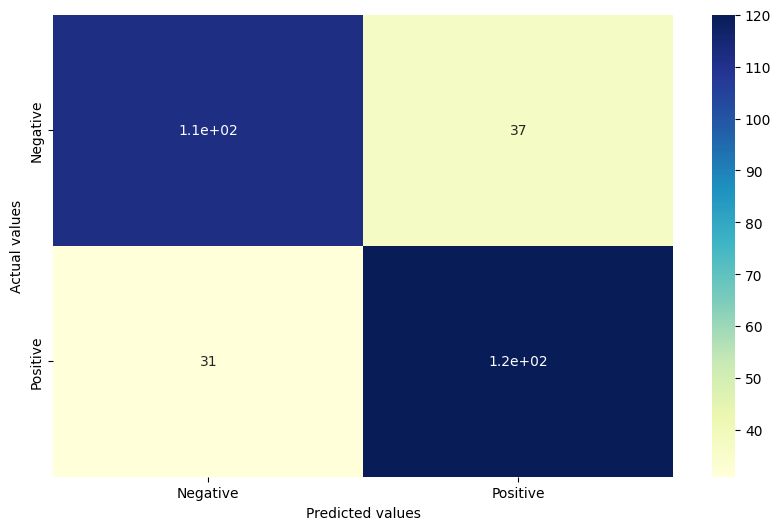

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 501,criterion = "entropy")

model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [ ]:
from nltk.metrics.scores import precision
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score
y_pred = model.predict(x_test)

accuracy_score = accuracy_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)

print("accuracy score:",round(accuracy_score*100, 2))
print("precision score:",round(precision_score*100, 2))
print("recall score:",round(recall_score*100, 2))



accuracy score: 77.0
precision score: 83.61
recall score: 67.55


# SVM


In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)


In [ ]:
from sklearn import metrics
print("Accuracy:",round(accuracy_score(y_test, y_pred)*100,2))
print("precision score:",round(precision_score*100, 2))
print("recall score:",round(recall_score*100, 2))

Accuracy: 76.0
precision score: 74.84
recall score: 78.81


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final SVM model with the best hyperparameters
best_svm = SVC(**best_params)
best_svm.fit(x_train, y_train)

# Evaluate the model on the test set
accuracy = best_svm.score(x_test, y_test)
print("Test Accuracy:", round(accuracy * 100 ,2))

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 77.0


# Hyperparameter tuning Naive Bayes classifier

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1, 0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(x_train, y_train)
  temp_y_pred = temp_classifier.predict(x_test)
  accuracy_score = metrics.accuracy_score(y_test, temp_y_pred)
  print("Accuracy score: {}, alpha Value {}".format(round(accuracy_score * 100, 2), round(i, 1)))

  if( accuracy_score > best_accuracy):
    best_accuracy = accuracy_score
    alpha_val = i

print("__________________________________")
print("Best accuracy is {}% with alpha value as {}".format(best_accuracy*100,2), round(alpha_val,1))

Accuracy score: 75.5, alpha Value 0.1
Accuracy score: 75.0, alpha Value 0.2
Accuracy score: 74.0, alpha Value 0.3
Accuracy score: 74.0, alpha Value 0.4
Accuracy score: 74.0, alpha Value 0.5
Accuracy score: 73.5, alpha Value 0.6
Accuracy score: 73.0, alpha Value 0.7
Accuracy score: 73.0, alpha Value 0.8
Accuracy score: 73.0, alpha Value 0.9
Accuracy score: 73.5, alpha Value 1.0
__________________________________
Best accuracy is 75.5% with alpha value as 2 0.1


In [ ]:
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.2)

# predictions

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
review = 'food is not good!'

if predict_sentiment(review):
  print('this is a +ve review')
else:
  print('this -ve review')

this is a +ve review


# Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:

y_pred = model.predict(x_test)

y_pred

acc = round(model.score(x_train,y_train)*100,2)
print("accuracy in Training set: "+str(acc)+'%')

acc = round(model.score(x_test,y_test)*100,2)
print("accuracy in Testing set: "+str(acc)+'%')





accuracy in Training set: 99.71%
accuracy in Testing set: 67.67%


**PLOTTING**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[121,  38],
       [ 59,  82]])

Text(95.72222222222221, 0.5, 'Actual values')

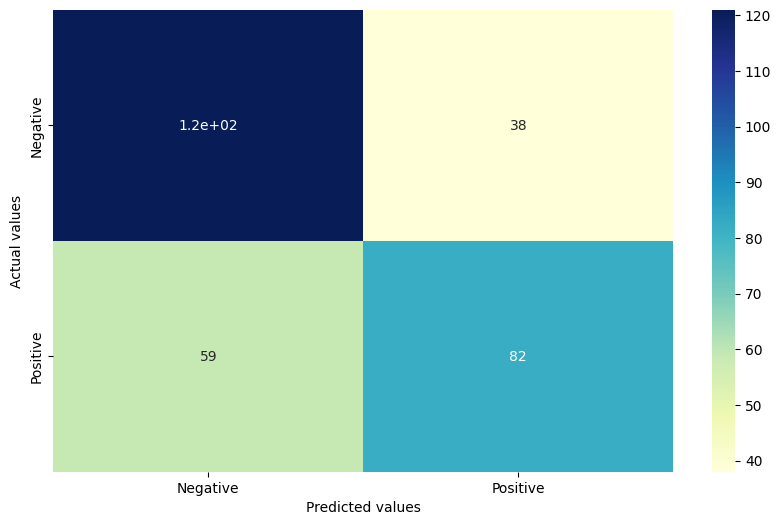

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()